In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
plt.style.use('default')
sns.set_theme(style="whitegrid")

# Load data
df = pd.read_csv('../data/raw/data.csv')

# Preview data
df.head()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [3]:
df.describe()


,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [4]:
df.isnull().sum()


TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

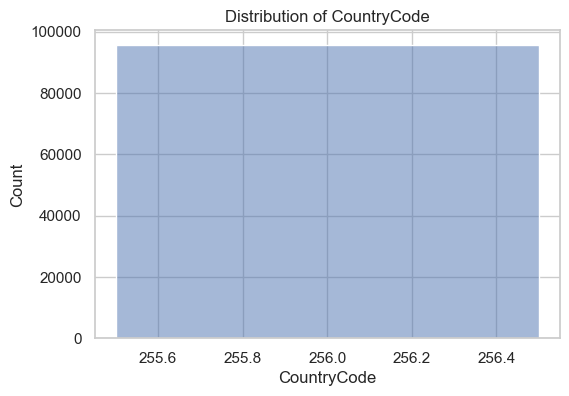

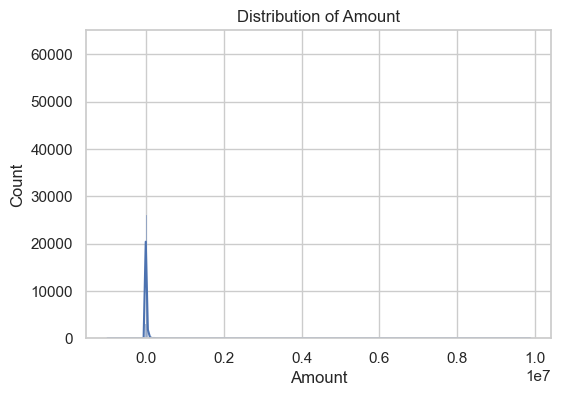

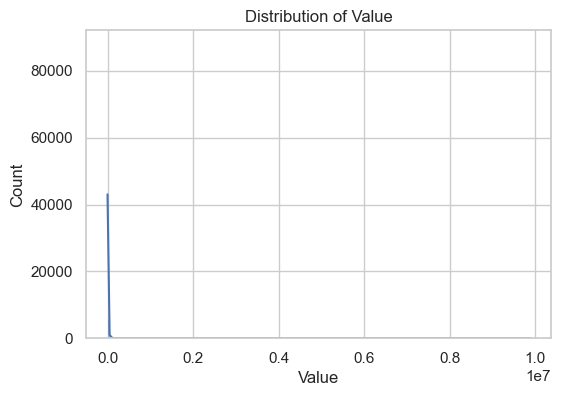

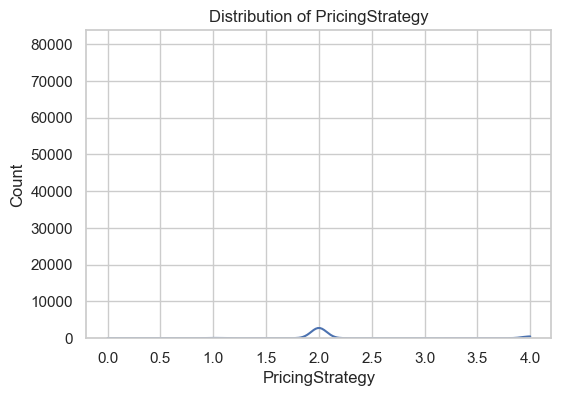

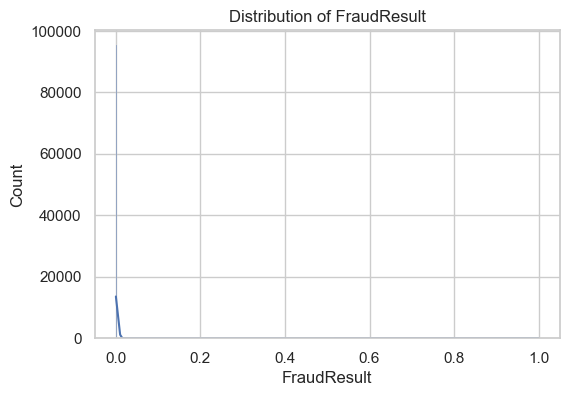

In [5]:
numerical_cols = df.select_dtypes(include=np.number).columns

for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


Skipping 'TransactionId' (identifier or timestamp)
Skipping 'BatchId' (identifier or timestamp)
Skipping 'AccountId' (identifier or timestamp)
Skipping 'SubscriptionId' (identifier or timestamp)
Skipping 'CustomerId' (identifier or timestamp)
Skipping 'CurrencyCode' (only one unique value)
Skipping 'ProviderId' (identifier or timestamp)
Skipping 'ProductId' (identifier or timestamp)


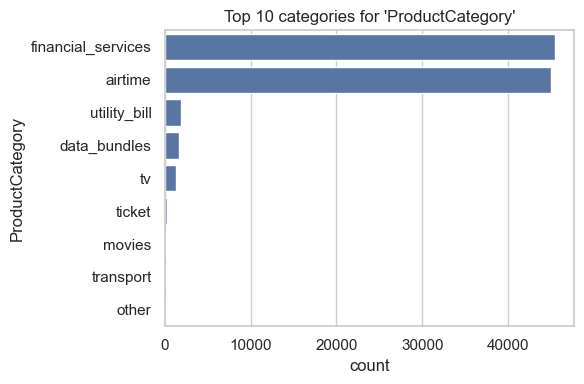

Skipping 'ChannelId' (identifier or timestamp)
Skipping 'TransactionStartTime' (identifier or timestamp)


In [12]:
categorical_cols = df.select_dtypes(include='object').columns

# Parameters to control plotting
TOP_N = 10          # show only top 10 categories
MAX_UNIQUE = 20     # skip columns with too many unique values

# Explicitly exclude ID / timestamp-like columns
exclude_keywords = ['id', 'time', 'date']

for col in categorical_cols:
    
    # Skip columns that look like IDs or timestamps
    if any(keyword in col.lower() for keyword in exclude_keywords):
        print(f"Skipping '{col}' (identifier or timestamp)")
        continue

    unique_count = df[col].nunique()

    # Skip high-cardinality categorical columns
    if unique_count > MAX_UNIQUE:
        print(f"Skipping '{col}' ({unique_count} unique values)")
        continue

    # Skip columns with only one category
    if unique_count <= 1:
        print(f"Skipping '{col}' (only one unique value)")
        continue

    # Get top categories
    top_categories = df[col].value_counts().head(TOP_N)

    plt.figure(figsize=(6, 4))
    sns.countplot(
        y=df[col],
        order=top_categories.index
    )
    plt.title(f"Top {TOP_N} categories for '{col}'")
    plt.tight_layout()
    plt.show()

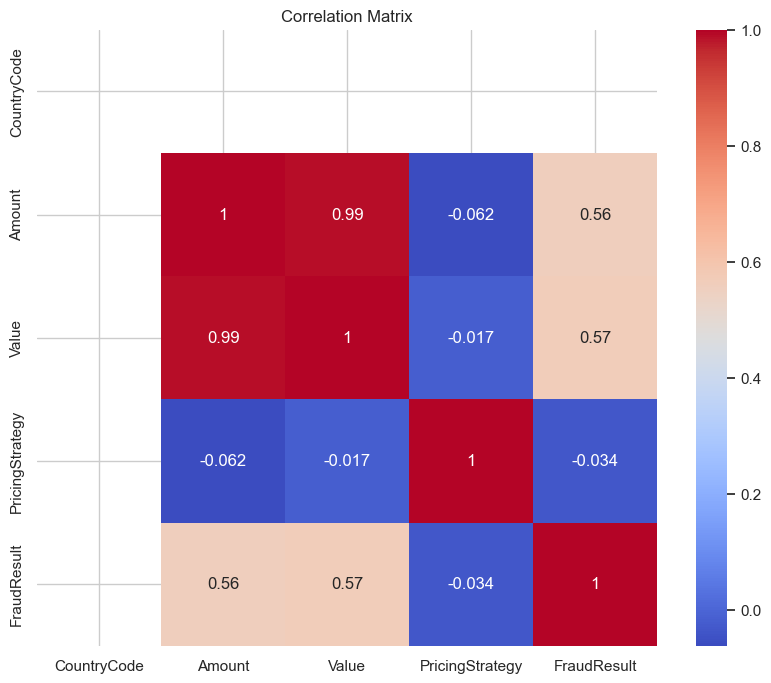

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


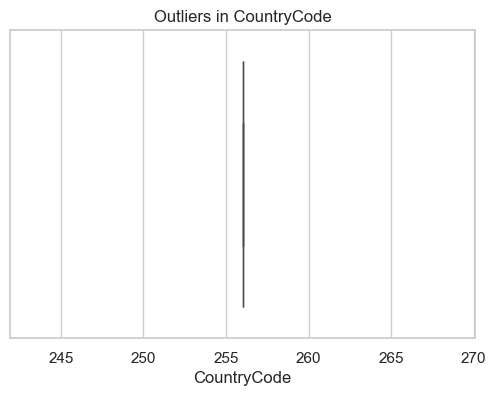

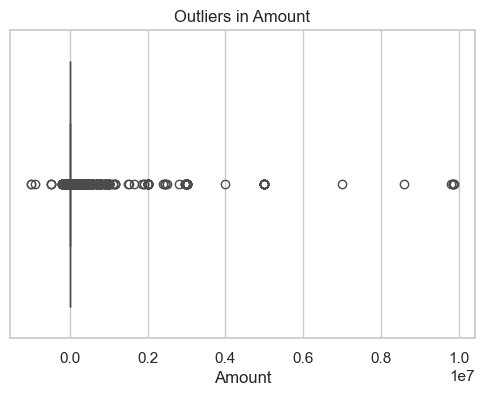

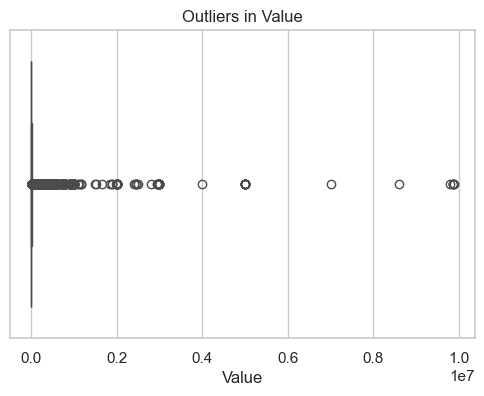

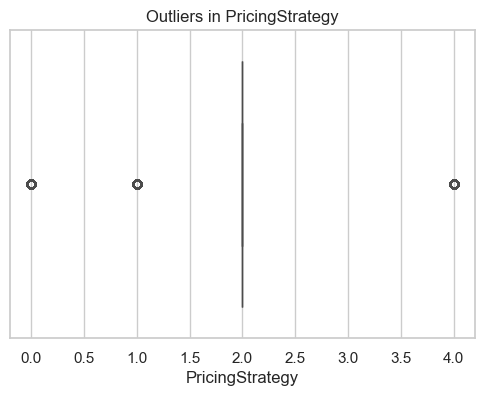

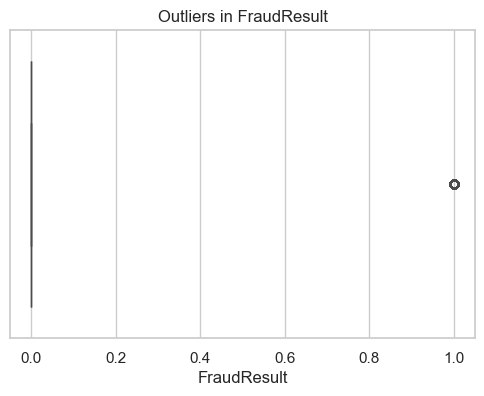

In [9]:
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Outliers in {col}')
    plt.show()
